###  <font color=orange>_This notebook contains all the mathematical concepts as well as the code for logistic regression from scratch without using any library!!!_ <font color=red>Bi-Class classification using gradient descent algo</font>

**Logistic regression is a discriminative algorithm(Discriminative algorithm are those algorithms for which in order to perform classification i.e., to calculate $p(class=+ve/-ve / X)$. you don't need to calculate $p(X / class=+ve/-ve)$.**

Now, we know by applying the **discriminant function** , we get
$$\frac{p(class=+ve/X)}{p(class=-ve/X)} = \log e^\frac{p(class=+ve/X)}{p(class=-ve/X)}$$

we know,
        $$\Sigma_{+ve} = \Sigma_{+ve} = \Sigma_{pooled}$$
        
**For Bi-class logistic regression,**
        $$\log e^\frac{p(class=+ve/X)}{p(class=-ve/X)} = {\theta}_0+{\theta^T}X $$
Taking exponent on both sides,
        $$\frac{p(class=+ve/X)}{p(class=-ve/X)} = e^{{\theta}_0+{\theta^T}X} $$
Flipping sides,        
        $$\frac{p(class=-ve/X)}{p(class=+ve/X)} = e^{-{(\theta}_0+{\theta^T}X)} $$
or,
        $$\frac{1 - p(class=+ve/X)}{p(class=+ve/X)} = e^{-{(\theta}_0+{\theta^T}X)} $$
or,
        $$\frac{1}{p(class=+ve/X)} - 1 = e^{-{(\theta}_0+{\theta^T}X)} $$
or,
        $$\frac{1}{p(class=+ve/X)} = 1 + e^{-{(\theta}_0+{\theta^T}X)} $$
or,
        $$p(class=+ve/X) = \frac{1} {1+ e^{-{(\theta}_0+{\theta^T}X)}} $$
**This is the logistic function also known as the sigmoid/Cos function(More usage in Neural-Net's)**,       
        $$\large{f(x) = \frac{1} {1+ e^{-x}}} $$
        
**below image shows the logistic regression plot**
![logistic regression](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNKqE-xo4sa36jgIYu97-57Y_mwwg1pUv6yZ4tMBk6UmvPBV0R)


**Evaluating the expression for logistic regression by using maximum likelihood loss or minimizing the -ve log likelihood loss for bi-class classification**

**using the Maximum likelihood estimation**
- using the assumption of IID(Independent and Identically distributed), we construct the likelihood function:
    $$P(X=x_1\cap{X=x_2}\cap{X=x_3}\cap........\cap {X=x^n})$$ <----**likelihood function**

or,
         $$P({X=x_1}.{X=x_2}.{X=x_3}........{X=x^n})$$

for biclass classification,
          $$L(\theta{_0},\theta) = \Pi{^n_{i=1}} [\color{green}{P(class=1}/X^i)^C{^i}] [\color{red}{P(class=0}/X^i)^{(1-{C{^i}})}]$$
where **$C^i$= class label of $i^{th}$ training data  and $X^i$ = $i^{th}$ example or $i^{th}$ row of pandas dataframe of training data.**
         $$\color{red}{P(class=0}/X^i) = 1-\color{green}{P(class=1}/X^i) $$
or,
        $$\color{red}{P(class=0}/X^i)=1 - \frac{1} {1+ e^{-{(\theta}_0+{\theta^T}X)}}$$
**Let's say that $H_i(\theta{_0},\theta)=\frac{1} {1+ e^{-{(\theta}_0+{\theta^T}X)}}$ and** $1-H_i(\theta{_0},\theta)=1-\frac{1} {1+ e^{-{(\theta}_0+{\theta^T}X)}}$ 

**Therefore, $\color{green}{P(class=1}=H_i(\theta{_0},\theta)$ and** $\color{red}{P(class=0}/X^i)=1-H_i(\theta{_0},\theta)$

$$L(\theta{_0},\theta) = \Pi{^n_{i=1}} [H_i(\theta{_0},\theta)^C{^i}] [1-H_i(\theta{_0},\theta))^{(1-{C{^i}})}]$$ **where $C^i=1$ if $X^i	\epsilon {\color{green} {+ve class}}$ or $C^i=0$ if $X^i	\epsilon {\color{red} {-ve class}}$** 
**applying -ve log likelihood loss,we get**
$$\large{-log_e^{L(\theta{_0},\theta)}={-1 \over N} \Sigma_{i=1}^{n}log_e^{[H_i(\theta{_0},\theta)^C{^i}] [1-H_i(\theta{_0},\theta))^{(1-{C{^i}})}]}}$$ **let's take this equation as $\large{F(x)}$ and put it as derivative in gradient descent algorithm**
Taking the partial derivative using chain rule of the above equation, we get
$${\delta \over \delta {\theta}}{(-log_e^{L(\theta{_0},\theta)})}={-1 \over N} \Sigma_{i=1}^{n}[C^i{\delta \over \delta {\theta}}(log_e^{H_i(\theta{_0},\theta)})+(1-C^i){\delta \over \delta {\theta}}(log_e^{[1-[H_i(\theta{_0},\theta)]})]$$
**after solving, the final equation for f(x) in gradient is:**
$$\large{{\delta \over \delta {\theta}}{(-log_e^{L(\theta{_0},\theta)})}={1 \over N} \Sigma_{i=1}^{n}X^i[{H_i(\theta{_0},\theta)}-C^i]}$$

In [0]:
import pandas as pd
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt

In [0]:
raw_data = pd.read_csv("gdrive/My Drive/Colab Notebooks/data.csv")

In [0]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
len(raw_data)

569

In [0]:
training_data_len = int(0.70 * len(raw_data))

In [0]:
training_data = raw_data.iloc[0:training_data_len,:]

In [0]:
testing_data = raw_data.iloc[training_data_len:,:]

In [0]:
#training_data

In [0]:
column_names = raw_data.columns

In [0]:
column_names

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [0]:
training_data.drop([column_names[0],column_names[32]],axis=1,inplace=True)
testing_data.drop([column_names[0],column_names[32]],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
training_data = pd.DataFrame(training_data)
testing_data = pd.DataFrame(testing_data)

In [0]:
training_data['diagnosis'].replace(to_replace='B',value=0,inplace=True)
testing_data['diagnosis'].replace(to_replace='B',value=0,inplace=True)

In [0]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
training_data['diagnosis'].replace(to_replace='M',value=1,inplace=True)
testing_data['diagnosis'].replace(to_replace='M',value=1,inplace=True)

In [0]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
class_labels = training_data['diagnosis']

In [0]:
class_labels 

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
368    1
369    1
370    1
371    0
372    1
373    1
374    0
375    0
376    0
377    0
378    0
379    1
380    0
381    0
382    0
383    0
384    0
385    1
386    0
387    0
388    0
389    1
390    0
391    0
392    1
393    1
394    0
395    0
396    0
397    0
Name: diagnosis, Length: 398, dtype: int64

In [0]:
C = np.array(class_labels)

In [0]:
C.shape

(398,)

In [0]:
C= C.reshape(C.shape[0],1)

In [0]:
C.shape

(398, 1)

In [0]:
pure_training_data = training_data.drop(['diagnosis'],axis=1,inplace=False)

In [0]:
pure_training_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
N = pure_training_data.shape[0]

n = pure_training_data.shape[1]

In [0]:
N

398

In [0]:
n 

30

In [0]:
X = np.array(pure_training_data)

In [0]:
X = X/np.max(X,axis=0)

In [0]:
X

array([[0.63998577, 0.26425662, 0.65145889, ..., 0.91202749, 0.69313046,
        0.57301205],
       [0.73176805, 0.45239308, 0.70503979, ..., 0.63917526, 0.41428141,
        0.42901205],
       [0.70046247, 0.54098778, 0.68965517, ..., 0.83505155, 0.54429045,
        0.42207229],
       ...,
       [0.50017787, 0.43737271, 0.47612732, ..., 0.27185567, 0.38008436,
        0.31850602],
       [0.48061188, 0.48090631, 0.46737401, ..., 0.49931271, 0.401627  ,
        0.37040964],
       [0.45535397, 0.44450102, 0.44058355, ..., 0.28508591, 0.2994878 ,
        0.33990361]])

In [0]:
X1_transpose = X[0,:]

In [0]:
X1_transpose.shape

(30,)

In [0]:
theta0_initial = np.random.randn(1,1)

In [0]:
theta0_initial

array([[1.94719308]])

In [0]:
theta_initial = np.random.randn(X.shape[1],1)

In [0]:
theta_initial

array([[-0.89396638],
       [-1.6359361 ],
       [ 0.84878256],
       [ 0.23407439],
       [ 0.11114454],
       [ 0.2918092 ],
       [ 0.14203514],
       [-0.75952582],
       [ 1.0236852 ],
       [-0.68016082],
       [-1.45189707],
       [ 0.26172163],
       [ 0.54695622],
       [ 0.85758271],
       [ 2.39323136],
       [ 0.70773145],
       [ 2.55158533],
       [-1.59459036],
       [ 1.47814095],
       [-0.1628032 ],
       [ 0.38769517],
       [-0.80712156],
       [-0.57350881],
       [ 0.19743603],
       [ 1.055325  ],
       [ 0.94197949],
       [ 0.99378432],
       [-2.38903068],
       [-1.07428112],
       [-0.07494501]])

In [0]:
epsilon = 0.0001
alpha = 0.01

In [0]:
power = (theta0_initial + np.matmul(X,theta_initial))

In [0]:
power

array([[ 1.45670924],
       [ 0.34872265],
       [ 0.23629951],
       [ 1.8349087 ],
       [ 1.66210497],
       [ 1.67578668],
       [ 0.38694477],
       [ 1.12815684],
       [ 0.90965013],
       [ 1.83766953],
       [ 0.50098164],
       [ 1.04548156],
       [ 0.73415269],
       [ 1.39334354],
       [ 1.2793934 ],
       [ 1.20073293],
       [ 0.47189742],
       [ 0.7397211 ],
       [ 0.18312692],
       [ 1.53966623],
       [ 1.72732611],
       [ 2.06328784],
       [ 1.4653235 ],
       [ 0.00472279],
       [ 0.54087102],
       [ 0.4868054 ],
       [ 0.05581744],
       [ 1.34765564],
       [ 0.66711776],
       [ 1.15145246],
       [ 0.95967809],
       [ 1.63598406],
       [ 1.17031607],
       [ 0.96599   ],
       [ 0.96393664],
       [ 0.96824806],
       [ 1.33631806],
       [ 1.32885478],
       [ 0.77816331],
       [ 0.54910967],
       [ 0.68437681],
       [ 1.24534885],
       [ 1.45410765],
       [ 0.94099271],
       [ 0.49667212],
       [ 1

In [0]:
H_theta0_theta = 1/(1+ np.exp(-power))

In [0]:
H_theta0_theta

array([[0.81102885],
       [0.58630779],
       [0.55880152],
       [0.86234545],
       [0.84052037],
       [0.84234581],
       [0.595547  ],
       [0.75549859],
       [0.71292856],
       [0.86267285],
       [0.62268999],
       [0.73990629],
       [0.67571589],
       [0.80112548],
       [0.7823465 ],
       [0.76865514],
       [0.61583275],
       [0.67693486],
       [0.54565422],
       [0.8234162 ],
       [0.84907008],
       [0.88728341],
       [0.81234554],
       [0.50118069],
       [0.63201502],
       [0.61935358],
       [0.51395074],
       [0.79374609],
       [0.66085748],
       [0.75977611],
       [0.72305735],
       [0.83698775],
       [0.76320214],
       [0.7243195 ],
       [0.72390929],
       [0.72477016],
       [0.7918838 ],
       [0.79065114],
       [0.68528413],
       [0.633929  ],
       [0.66471486],
       [0.77649369],
       [0.8106298 ],
       [0.71930014],
       [0.62167695],
       [0.76685452],
       [0.91101544],
       [0.704

In [0]:
temp = (H_theta0_theta - C)

In [0]:
temp 

array([[-0.18897115],
       [-0.41369221],
       [-0.44119848],
       [-0.13765455],
       [-0.15947963],
       [-0.15765419],
       [-0.404453  ],
       [-0.24450141],
       [-0.28707144],
       [-0.13732715],
       [-0.37731001],
       [-0.26009371],
       [-0.32428411],
       [-0.19887452],
       [-0.2176535 ],
       [-0.23134486],
       [-0.38416725],
       [-0.32306514],
       [-0.45434578],
       [ 0.8234162 ],
       [ 0.84907008],
       [ 0.88728341],
       [-0.18765446],
       [-0.49881931],
       [-0.36798498],
       [-0.38064642],
       [-0.48604926],
       [-0.20625391],
       [-0.33914252],
       [-0.24022389],
       [-0.27694265],
       [-0.16301225],
       [-0.23679786],
       [-0.2756805 ],
       [-0.27609071],
       [-0.27522984],
       [-0.2081162 ],
       [ 0.79065114],
       [-0.31471587],
       [-0.366071  ],
       [-0.33528514],
       [-0.22350631],
       [-0.1893702 ],
       [-0.28069986],
       [-0.37832305],
       [-0

In [0]:
temp.shape

(398, 1)

In [0]:
dels = np.matmul((X.T),temp)

In [0]:
dels

array([[48.90973559],
       [53.91126565],
       [46.05334191],
       [13.82599793],
       [85.70495676],
       [22.52090243],
       [ 2.62483121],
       [ 1.38610647],
       [77.64071355],
       [90.58734629],
       [ 8.37691191],
       [34.44685656],
       [ 7.48802963],
       [ 0.7356536 ],
       [34.63233386],
       [20.21210873],
       [ 8.64799748],
       [22.29446807],
       [39.76531505],
       [18.13803083],
       [42.008372  ],
       [54.51126865],
       [38.58605849],
       [ 7.65105337],
       [72.81180506],
       [13.9226669 ],
       [ 6.99554499],
       [13.92301664],
       [52.69624422],
       [50.14904976]])

In [0]:
dels.shape

(30, 1)

In [53]:
i = 0
alpha = 0.1
epsilon = 0.000001

neg_log_like_loss = []
iterations = []


while (True):
    
    power_initial = theta0_initial + np.matmul(X,theta_initial)
    H_theta0_theta_initial = 1/(1 + np.exp(-power_initial))
    temp = (H_theta0_theta_initial - C)
    dels = np.matmul(X.T,temp)/N
    
    #The code above is calculating the matix of derivatives wrt all thetas except theta0
    
    neg_log_like_initial = -(np.matmul(C.T,np.log(H_theta0_theta_initial)) + (np.matmul((1-C).T,np.log(1-H_theta0_theta_initial))))/N
    
    #The statement above is computing the value of Negative Log Likelhood function at initial values of Thetas
    
    theta0_final = theta0_initial - (alpha*(np.sum(temp))/N)
    theta_final = theta_initial - alpha*dels
    
    
    #The code above is updating the values of Thetas using Gradient Descent
    
    
    power_final = theta0_final + np.matmul(X,theta_final)
    H_theta0_theta_final = 1/(1 + np.exp(-power_final))
    neg_log_like_final = -(np.matmul(C.T,np.log(H_theta0_theta_final)) + (np.matmul((1-C).T,np.log(1-H_theta0_theta_final))))/N 
    
    #The code above is recomputing the value of Negative Log Likelihood Function at updated values of Thetas
    
    if abs(neg_log_like_initial - neg_log_like_final) < epsilon:
        
        break 
    
    
    theta0_initial = theta0_final
    theta_initial = theta_final
    
    i += 1
    
    iterations.append(i)
    neg_log_like_loss.append(neg_log_like_initial)
    
    print("The value of Negative Log Likelihood Function in iteration # {} is {}".format(i, neg_log_like_initial))

The value of Negative Log Likelihood Function in iteration # 1 is [[1.26676192]]
The value of Negative Log Likelihood Function in iteration # 2 is [[1.22337482]]
The value of Negative Log Likelihood Function in iteration # 3 is [[1.18700322]]
The value of Negative Log Likelihood Function in iteration # 4 is [[1.15668045]]
The value of Negative Log Likelihood Function in iteration # 5 is [[1.13145502]]
The value of Negative Log Likelihood Function in iteration # 6 is [[1.11044545]]
The value of Negative Log Likelihood Function in iteration # 7 is [[1.09287097]]
The value of Negative Log Likelihood Function in iteration # 8 is [[1.07806295]]
The value of Negative Log Likelihood Function in iteration # 9 is [[1.06546323]]
The value of Negative Log Likelihood Function in iteration # 10 is [[1.05461475]]
The value of Negative Log Likelihood Function in iteration # 11 is [[1.04514864]]
The value of Negative Log Likelihood Function in iteration # 12 is [[1.0367705]]
The value of Negative Log 

In [55]:
len(iterations)

23823

In [56]:
len(neg_log_like_loss)

23823

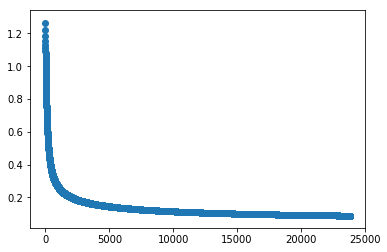

In [57]:
plt.scatter(iterations,neg_log_like_loss)

In [58]:
theta0_final

array([[-8.8355021]])

In [59]:
theta_final

array([[-1.36983978],
       [ 2.56888155],
       [ 0.67787034],
       [ 2.81667889],
       [-1.57039461],
       [ 0.84781296],
       [ 3.12868558],
       [ 5.97271868],
       [-1.83794037],
       [-7.22613647],
       [ 3.08027837],
       [ 0.5499585 ],
       [ 4.0057721 ],
       [ 4.05145306],
       [ 1.77112404],
       [-3.43816754],
       [-0.40831371],
       [-2.16965138],
       [-0.51763311],
       [-3.26100656],
       [ 3.17310264],
       [ 5.40024139],
       [ 2.03659066],
       [ 5.77972366],
       [ 2.26757255],
       [ 3.05491416],
       [ 3.28351957],
       [ 5.4753568 ],
       [ 0.42989524],
       [-1.19586179]])

In [0]:
#How will you perform testing in Logistic Regression

In [0]:
class_labels2 = testing_data['diagnosis']
C2 = np.array(class_labels2)

In [0]:
C2= C2.reshape(C2.shape[0],1)

In [0]:
pure_testing_data = testing_data.drop(['diagnosis'],axis=1,inplace=False)

In [0]:
X1 = np.array(pure_testing_data)

In [67]:
pure_testing_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
398,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,0.1855,0.6881,1.263,12.98,0.004259,0.01469,0.01940,0.004168,0.01191,0.003537,12.68,20.35,80.79,496.7,0.11200,0.1879,0.2079,0.05556,0.2590,0.09158
399,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.016380,0.1847,0.06019,0.3438,1.1400,2.225,25.06,0.005463,0.01964,0.02079,0.005398,0.01477,0.003071,13.45,24.49,86.00,562.0,0.12440,0.1726,0.1449,0.05356,0.2779,0.08121
400,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.119800,0.2113,0.07115,0.4030,0.7747,3.123,41.51,0.007159,0.03718,0.06165,0.010510,0.01591,0.005099,20.80,27.78,149.60,1304.0,0.18730,0.5917,0.9034,0.19640,0.3245,0.11980
401,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.017960,0.1601,0.05541,0.2522,1.0450,1.649,18.95,0.006175,0.01204,0.01376,0.005832,0.01096,0.001857,13.80,20.14,87.64,589.5,0.13740,0.1575,0.1514,0.06876,0.2460,0.07262
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.018830,0.1874,0.05899,0.2357,1.2990,2.397,20.21,0.003629,0.03713,0.03452,0.010650,0.02632,0.003705,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247


In [71]:
X1 = X1/np.max(X1,axis=0)
X1.shape

(171, 30)

In [72]:
theta0_final

array([[-8.8355021]])

In [0]:
p=theta0_final+np.dot(X1,theta_final)

In [74]:
p

array([[ -6.42943252],
       [ -4.89916285],
       [  9.45136815],
       [ -4.35418586],
       [ -5.58314703],
       [ -4.37759178],
       [ -5.68476015],
       [ -3.81892485],
       [ -1.24491961],
       [ -6.21233222],
       [  5.30782646],
       [ -2.81043057],
       [ -1.59187345],
       [ -4.39908771],
       [ -7.55601163],
       [ -0.07435295],
       [  0.9866619 ],
       [ -3.98587255],
       [ -5.2845324 ],
       [  8.0766658 ],
       [ -6.20675937],
       [ -4.7125749 ],
       [ -4.36811499],
       [ -2.74995882],
       [ -3.59799559],
       [ -1.22263963],
       [ -6.45751858],
       [ -6.33813717],
       [ -6.31743729],
       [ -3.55598852],
       [ -7.04766322],
       [ -4.63871599],
       [  5.60304948],
       [ -5.87392926],
       [  8.39088429],
       [  6.47755166],
       [ -3.17151488],
       [  3.15237072],
       [ -4.08105367],
       [ -3.26981791],
       [ -2.74915565],
       [ -4.35968951],
       [ -2.31960455],
       [  5

In [0]:
output=((1)/(1+np.exp(-p)))

In [77]:
output.shape

(171, 1)

In [86]:
size=171
greater=0
for i in range(171):
  if output[i]>=0.5:
    greater+=1
print(greater)

39


In [87]:
accuracy = (greater/size)*100
print(accuracy)

22.807017543859647
